In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
path = r"XXXX-XXXX"
con = sqlite3.connect(path)
cur = con.cursor()
midfield = pd.read_sql_query("SELECT *  FROM avgPlayerStatistics AS ps WHERE ps.player_position = 'M' ;", con)
midfield_1 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'M' AND ps.total_goals = 1 ;", con)
midfield_2 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'M'AND ps.total_goals = 2 ;", con)
midfield_3 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'M' AND ps.total_goals = 3 ;", con)

In [8]:
pd.set_option('display.max_columns', None)
midfield.describe()

,index,assists,blocks,commited_fouls,commited_penalty,conceded,drawn_fouls,dribble_attempts,dribble_past,dribble_success,fixture_id,interceptions,key_passes,minutes,missed_penalty,number,offside,on_goal_shots,pass_accuracy,player_id,rating,red,saved_penalty,saves,scored_penalty,timestamp,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
count,120783.000000,120783.000000,120783.000000,120783.0,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.0,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.0,120783.000000,120783.000000,1.207830e+05,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000,120783.000000
mean,23983.292914,0.091772,0.086638,0.0,0.007659,0.000003,1.131268,1.511260,0.968199,0.893046,175298.848455,1.054901,0.942867,71.504160,0.002638,18.379739,0.0,0.347771,70.079870,23341.410612,4.171821,0.006858,0.0,0.000010,0.009717,1.531809e+09,8.101756,0.098568,29.234491,1.022619,0.791510,3.972700,0.008980,0.170284
std,14420.477841,0.157320,0.184660,0.0,0.042273,0.001151,0.794760,1.299091,0.667685,0.810169,204231.995211,0.833105,0.759599,19.362679,0.023761,15.021974,0.0,0.378127,20.973766,24717.023827,3.367921,0.039310,0.0,0.003453,0.052792,5.505992e+07,4.569230,0.170611,15.203260,0.801278,0.944573,2.441837,0.045556,0.193774
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.438972e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11479.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.600000,0.600000,0.400000,0.400000,17320.000000,0.400000,0.400000,61.000000,0.000000,8.000000,0.0,0.000000,67.400000,1860.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.485011e+09,5.400000,0.000000,18.200000,0.400000,0.000000,2.400000,0.000000,0.000000
50%,23011.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.200000,0.800000,0.600000,157049.000000,0.800000,0.800000,77.400000,0.000000,16.000000,0.0,0.200000,77.200000,20917.000000,6.600000,0.000000,0.0,0.000000,0.000000,1.534010e+09,8.400000,0.000000,27.000000,0.800000,0.400000,4.000000,0.000000,0.200000
75%,36463.500000,0.200000,0.200000,0.0,0.000000,0.000000,1.600000,2.000000,1.400000,1.200000,209116.000000,1.400000,1.400000,87.600000,0.000000,23.000000,0.0,0.600000,83.200000,37232.000000,6.940000,0.000000,0.0,0.000000,0.000000,1.579379e+09,11.000000,0.200000,38.000000,1.400000,1.400000,5.600000,0.000000,0.200000
max,49982.000000,2.000000,3.500000,0.0,1.000000,0.400000,10.000000,15.000000,6.000000,9.000000,705683.000000,7.400000,7.200000,105.000000,1.000000,99.000000,0.0,5.000000,110.800000,278547.000000,10.000000,1.000000,0.0,1.200000,1.000000,1.622398e+09,33.000000,2.000000,136.800000,10.000000,8.000000,16.200000,1.250000,2.000000


Identifikations daten können entfernt werden. <br>
Werte die einen Durchschnitt von 0 haben sind wertlose informationen

In [9]:
def drop_columns(df):
    df.drop(columns='fixture_id', inplace=True)
    df.drop(columns='index', inplace=True)
    df.drop(columns='timestamp', inplace=True)
    df.drop(columns='player_id', inplace=True)
    df.drop(columns='number', inplace=True)
    #drop mit mean 0 
    df.drop(columns='saves', inplace=True)
    df.drop(columns='offside', inplace=True)
    df.drop(columns='conceded', inplace=True)
    df.drop(columns='commited_fouls', inplace=True)
    df.drop(columns='saved_penalty', inplace=True)
    

drop_columns(midfield)
# drop_columns(midfield_1)
# drop_columns(midfield_2)
# drop_columns(midfield_3)

In [18]:
pd.set_option('display.max_columns', None)
display(midfield)

,assists,blocks,commited_penalty,drawn_fouls,dribble_attempts,dribble_past,dribble_success,interceptions,key_passes,minutes,missed_penalty,on_goal_shots,pass_accuracy,player_position,rating,red,scored_penalty,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,90.0,0.0,1.0,80.0,M,6.60,0.0,0.0,11.0,0.0,21.0,2.0,4.0,5.0,0.0,0.0
1,0.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0,0.0,90.0,0.0,0.0,84.0,M,7.00,0.0,0.0,18.0,0.0,54.0,2.0,3.0,8.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,68.0,0.0,0.0,92.0,M,6.90,0.0,0.0,3.0,0.0,38.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,1.0,4.0,1.0,1.0,3.0,0.0,90.0,0.0,0.0,74.0,M,6.60,0.0,0.0,15.0,0.0,29.0,1.0,4.0,7.0,0.0,0.0
4,0.0,0.0,0.0,7.0,8.0,0.0,4.0,0.0,1.0,90.0,0.0,0.0,69.0,M,7.00,0.0,0.0,23.0,0.0,25.0,2.0,3.0,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120778,0.0,0.0,0.0,2.2,2.0,0.4,1.0,0.4,1.4,86.4,0.0,0.4,13.2,M,0.00,0.0,0.0,9.2,0.0,17.0,0.8,0.0,4.0,0.0,0.2
120779,0.0,0.0,0.0,1.2,4.4,0.2,2.6,0.8,2.0,77.4,0.0,1.4,20.0,M,0.00,0.0,0.0,9.8,0.2,26.6,2.2,1.2,5.4,0.0,0.0
120780,0.0,0.0,0.0,1.4,1.4,0.4,0.6,0.2,0.0,25.6,0.0,0.4,35.2,M,3.74,0.0,0.0,2.6,0.0,4.6,0.6,0.2,1.6,0.0,0.0
120781,0.2,0.0,0.0,1.0,0.0,0.8,0.0,1.2,0.6,62.2,0.0,0.0,71.4,M,6.94,0.0,0.0,5.4,0.0,28.8,0.4,0.2,2.8,0.0,0.0


vieleicht wichtige werte für Mittelfeldspieler: assist, total passes, pass_accuracy, total_duels, won_duels, dribble_attempts, dribble_success, dribble_past

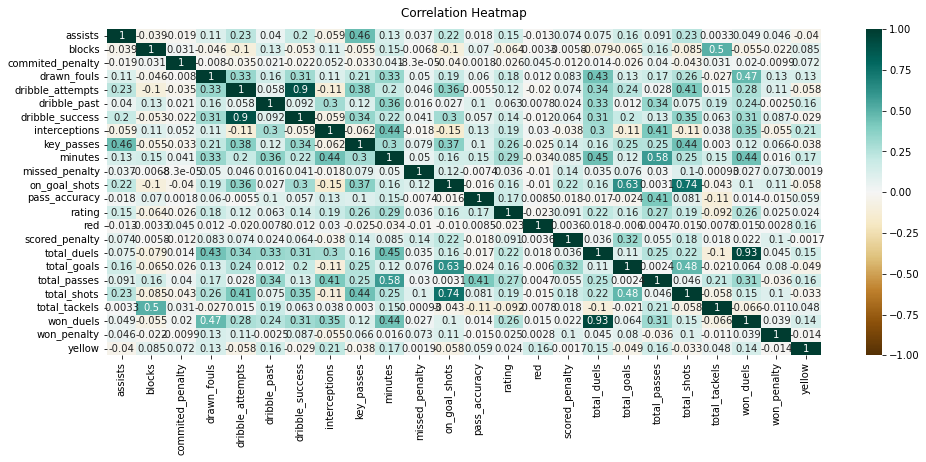

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(midfield.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

yello, red, missed penalty, commited penalty, block haben mit den anderen werten keinen zusammenhang und können raus

In [80]:
def drop_columns_withour_corr(df):
    df.drop(columns='yellow', inplace=True)
    df.drop(columns='red', inplace=True)
    df.drop(columns='missed_penalty', inplace=True)
    df.drop(columns='commited_penalty', inplace=True)
    df.drop(columns='blocks', inplace=True)

drop_columns_withour_corr(midfield)

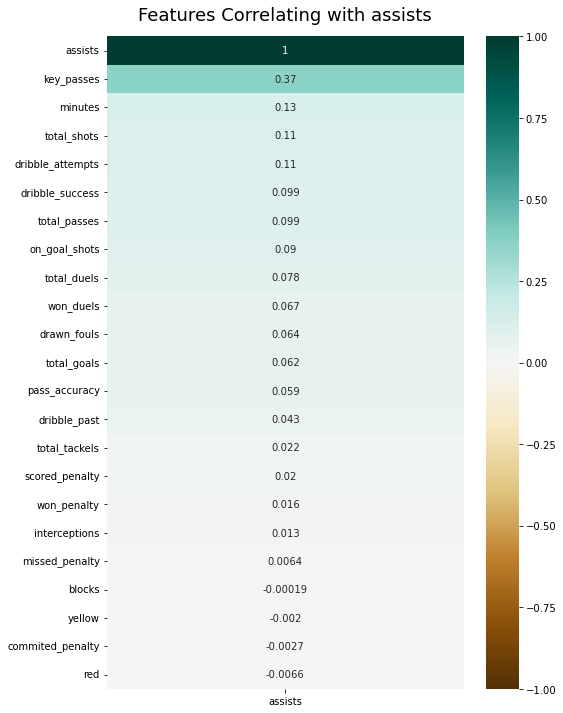

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='pearson')[['assists']].sort_values(by='assists', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with assists', fontdict={'fontsize':18}, pad=16);

Je mehr totalshots geschossen werden, desto mehr Tore werden geschossen. Warum? Der Bereich zwischen erstem quantil und zweiten quantil geht immer weiter hoch

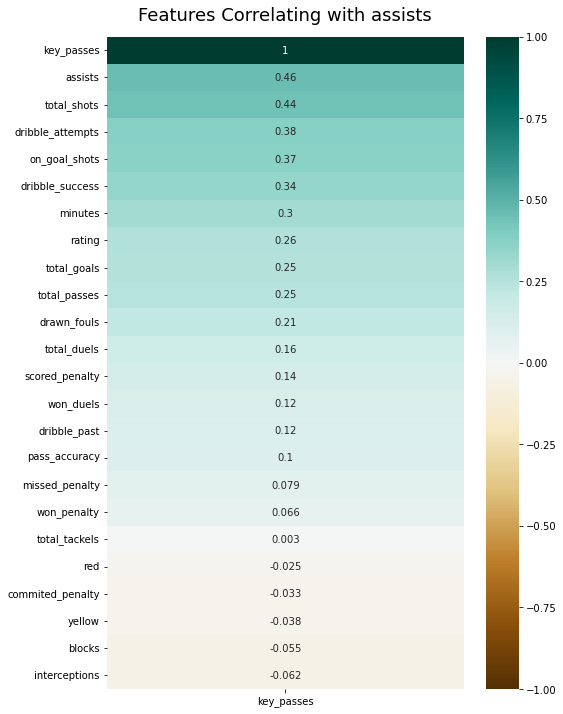

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['key_passes']].sort_values(by='key_passes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with assists', fontdict={'fontsize':18}, pad=16);

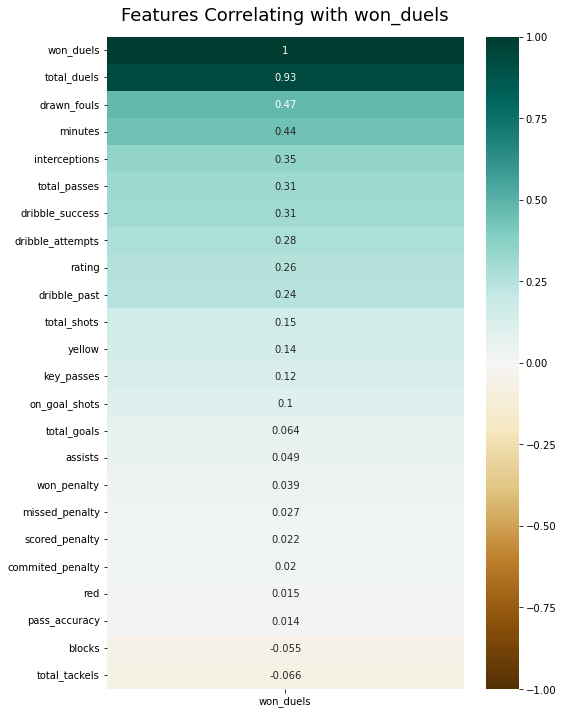

In [14]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['won_duels']].sort_values(by='won_duels', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with won_duels', fontdict={'fontsize':18}, pad=16);

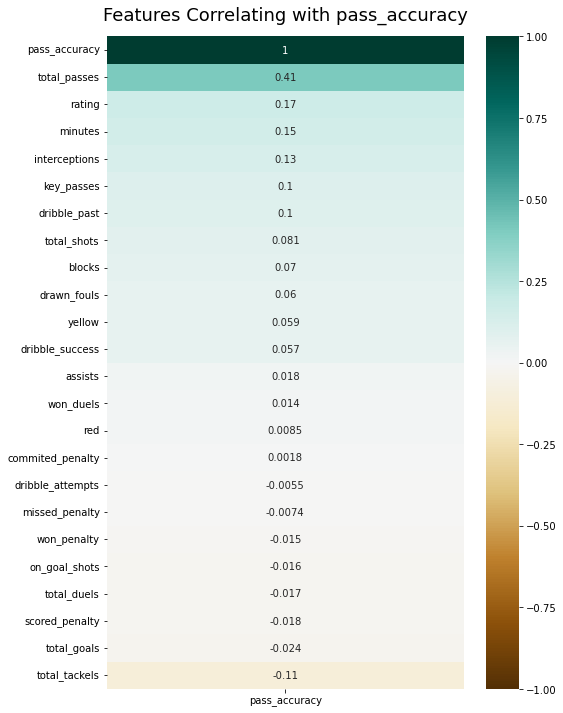

In [12]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['pass_accuracy']].sort_values(by='pass_accuracy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pass_accuracy', fontdict={'fontsize':18}, pad=16);

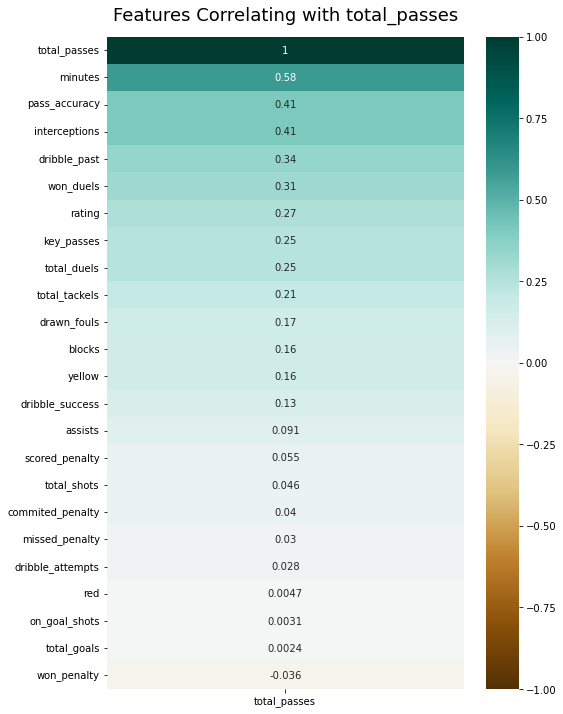

In [13]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['total_passes']].sort_values(by='total_passes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total_passes', fontdict={'fontsize':18}, pad=16);

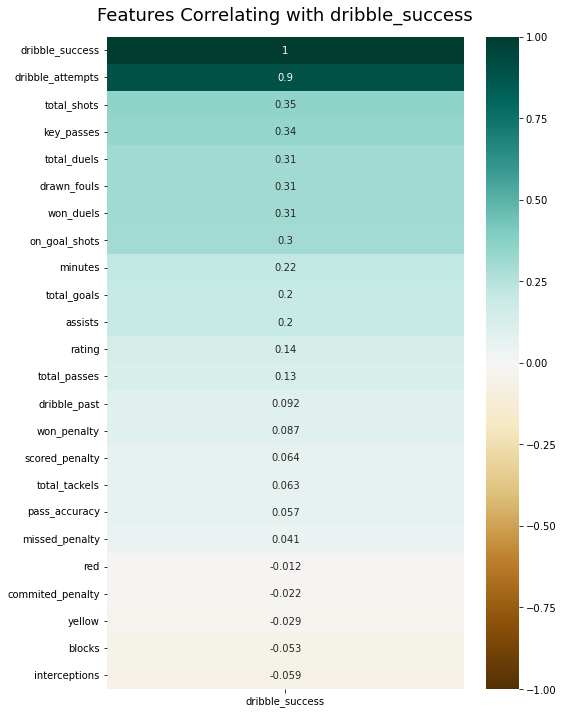

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['dribble_success']].sort_values(by='dribble_success', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with dribble_success', fontdict={'fontsize':18}, pad=16);

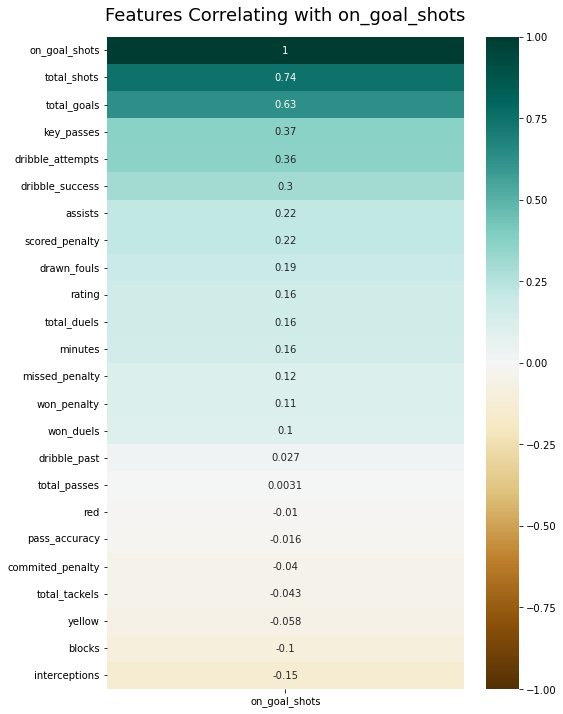

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(midfield.corr(method='spearman')[['on_goal_shots']].sort_values(by='on_goal_shots', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with on_goal_shots', fontdict={'fontsize':18}, pad=16);